# Regular Expressions
Regular expressions are text-matching patterns described with a formal syntax. You'll often hear regular expressions referred to as 'regex' or 'regexp' in conversation. Regular expressions can include a variety of rules, from finding repetition, to text-matching, and much more. As you advance in Python you'll see that a lot of your parsing problems can be solved with regular expressions (they're also a common interview question!).

If you're familiar with Perl, you'll notice that the syntax for regular expressions are very similar in Python. We will be using the re module with Python for this lecture.

Let's get started!

## Searching for Patterns in Text
One of the most common uses for the re module is for finding patterns in text. Let's do a quick example of using the search method in the re module to find some text:

In [1]:
import re

# List of patterns to search for
patterns = ['term1', 'term2']

# Text to parse
text = 'This is a string with term1, but it does not have the other term.'

for pattern in patterns:
    print('Searching for "%s" in:\n "%s"\n' %(pattern,text))
    
    #Check for match
    if re.search(pattern,text):
        print('Match was found. \n')
    else:
        print('No Match was found.\n')

Searching for "term1" in:
 "This is a string with term1, but it does not have the other term."

Match was found. 

Searching for "term2" in:
 "This is a string with term1, but it does not have the other term."

No Match was found.



Now we've seen that re.search() will take the pattern, scan the text, and then return a Match object. If no pattern is found, None is returned. To give a clearer picture of this match object, check out the cell below:



In [2]:
# List of patterns to search for
pattern = 'term1'

# Text to parse
text = 'This is a string with term1, but it does not have the other term.'

match = re.search(pattern,text)

type(match)

re.Match

This Match object returned by the search() method is more than just a Boolean or None, it contains information about the match, including the original input string, the regular expression that was used, and the location of the match. Let's see the methods we can use on the match object:

In [3]:
# Show start of match
match.start()

22

## Split with regular expressions
Let's see how we can split with the re syntax. This should look similar to how you used the split() method with strings.

In [4]:
# Term to split on
split_term = '@'

phrase = 'What is the domain name of someone with the email: hello@gmail.com'

# Split the phrase
re.split(split_term,phrase)

['What is the domain name of someone with the email: hello', 'gmail.com']

Note how re.split() returns a list with the term to split on removed and the terms in the list are a split up version of the string. Create a couple of more examples for yourself to make sure you understand!

Finding all instances of a pattern
You can use re.findall() to find all the instances of a pattern in a string. For example:

In [6]:
# Returns a list of all matches
re.findall('match','test phrase match is in middle')

['match']

## re Pattern Syntax
This will be the bulk of this lecture on using re with Python. Regular expressions support a huge variety of patterns beyond just simply finding where a single string occurred.

We can use metacharacters along with re to find specific types of patterns.

Since we will be testing multiple re syntax forms, let's create a function that will print out results given a list of various regular expressions and a phrase to parse:

In [7]:
def multi_re_find(patterns,phrase):
    '''
    Takes in a list of regex patterns
    Prints a list of all matches
    '''
    for pattern in patterns:
        print('Searching the phrase using the re check: %r' %(pattern))
        print(re.findall(pattern,phrase))
        print('\n')

## Repetition Syntax
There are five ways to express repetition in a pattern:

    1. A pattern followed by the meta-character * is repeated zero or more times.
    2. Replace the * with + and the pattern must appear at least once.
    3. Using ? means the pattern appears zero or one time.
    4. For a specific number of occurrences, use {m} after the pattern, where m is replaced with the number of times the pattern should repeat.
    5.Use {m,n} where m is the minimum number of repetitions and n is the maximum. Leaving out n {m,} means the value appears at least m times, with no maximum.
Now we will see an example of each of these using our multi_re_find function:



In [8]:
test_phrase = 'sdsd..sssddd...sdddsddd...dsds...dsssss...sdddd'

test_patterns = [ 'sd*',     # s followed by zero or more d's
                'sd+',          # s followed by one or more d's
                'sd?',          # s followed by zero or one d's
                'sd{3}',        # s followed by three d's
                'sd{2,3}',      # s followed by two to three d's
                ]

multi_re_find(test_patterns,test_phrase)

Searching the phrase using the re check: 'sd*'
['sd', 'sd', 's', 's', 'sddd', 'sddd', 'sddd', 'sd', 's', 's', 's', 's', 's', 's', 'sdddd']


Searching the phrase using the re check: 'sd+'
['sd', 'sd', 'sddd', 'sddd', 'sddd', 'sd', 'sdddd']


Searching the phrase using the re check: 'sd?'
['sd', 'sd', 's', 's', 'sd', 'sd', 'sd', 'sd', 's', 's', 's', 's', 's', 's', 'sd']


Searching the phrase using the re check: 'sd{3}'
['sddd', 'sddd', 'sddd', 'sddd']


Searching the phrase using the re check: 'sd{2,3}'
['sddd', 'sddd', 'sddd', 'sddd']




## Character Sets
Character sets are used when you wish to match any one of a group of characters at a point in the input. Brackets are used to construct character set inputs. For example: the input [ab] searches for occurrences of either a or b. Let's see some examples:

In [9]:
test_phrase = 'sdsd..sssddd...sdddsddd...dsds...dsssss...sdddd'

test_patterns = ['[sd]',    # either s or d
                's[sd]+']   # s followed by one or more s or d

multi_re_find(test_patterns,test_phrase)

Searching the phrase using the re check: '[sd]'
['s', 'd', 's', 'd', 's', 's', 's', 'd', 'd', 'd', 's', 'd', 'd', 'd', 's', 'd', 'd', 'd', 'd', 's', 'd', 's', 'd', 's', 's', 's', 's', 's', 's', 'd', 'd', 'd', 'd']


Searching the phrase using the re check: 's[sd]+'
['sdsd', 'sssddd', 'sdddsddd', 'sds', 'sssss', 'sdddd']




It makes sense that the first input [sd] returns every instance of s or d. Also, the second input s[sd]+ returns any full strings that begin with an s and continue with s or d characters until another character is reached.

## Exclusion
We can use ^ to exclude terms by incorporating it into the bracket syntax notation. For example: [^...] will match any single character not in the brackets. Let's see some examples:

In [10]:
test_phrase = 'This is a string! But it has punctuation. How can we remove it?'

Use [^!.? ] to check for matches that are not a !,.,?, or space. Add a + to check that the match appears at least once. This basically translates into finding the words.

In [11]:
re.findall('[^!.? ]+',test_phrase)

['This',
 'is',
 'a',
 'string',
 'But',
 'it',
 'has',
 'punctuation',
 'How',
 'can',
 'we',
 'remove',
 'it']

## Character Ranges
As character sets grow larger, typing every character that should (or should not) match could become very tedious. A more compact format using character ranges lets you define a character set to include all of the contiguous characters between a start and stop point. The format used is [start-end].

Common use cases are to search for a specific range of letters in the alphabet. For instance, [a-f] would return matches with any occurrence of letters between a and f.

Let's walk through some examples:

In [12]:
test_phrase = 'This is an example sentence. Lets see if we can find some letters.'

test_patterns=['[a-z]+',      # sequences of lower case letters
               '[A-Z]+',      # sequences of upper case letters
               '[a-zA-Z]+',   # sequences of lower or upper case letters
               '[A-Z][a-z]+'] # one upper case letter followed by lower case letters
                
multi_re_find(test_patterns,test_phrase)

Searching the phrase using the re check: '[a-z]+'
['his', 'is', 'an', 'example', 'sentence', 'ets', 'see', 'if', 'we', 'can', 'find', 'some', 'letters']


Searching the phrase using the re check: '[A-Z]+'
['T', 'L']


Searching the phrase using the re check: '[a-zA-Z]+'
['This', 'is', 'an', 'example', 'sentence', 'Lets', 'see', 'if', 'we', 'can', 'find', 'some', 'letters']


Searching the phrase using the re check: '[A-Z][a-z]+'
['This', 'Lets']




Escape Codes
You can use special escape codes to find specific types of patterns in your data, such as digits, non-digits, whitespace, and more. For example:

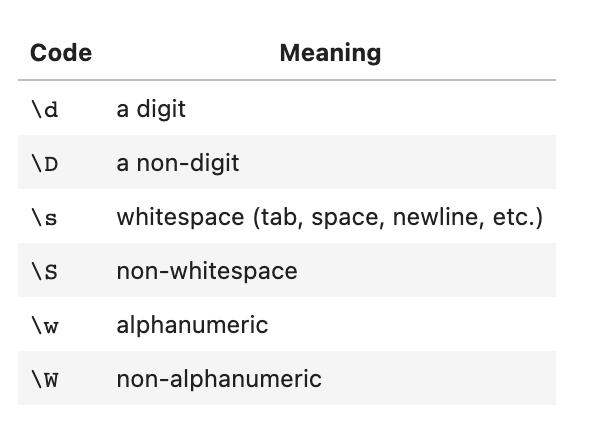

Escapes are indicated by prefixing the character with a backslash \. Unfortunately, a backslash must itself be escaped in normal Python strings, and that results in expressions that are difficult to read. Using raw strings, created by prefixing the literal value with r, eliminates this problem and maintains readability.

Personally, I think this use of r to escape a backslash is probably one of the things that block someone who is not familiar with regex in Python from being able to read regex code at first. Hopefully after seeing these examples this syntax will become clear.

In [14]:
test_phrase = 'This is a string with some numbers 1233 and a symbol #hashtag'

test_patterns=[ r'\d+', # sequence of digits
                r'\D+', # sequence of non-digits
                r'\s+', # sequence of whitespace
                r'\S+', # sequence of non-whitespace
                r'\w+', # alphanumeric characters
                r'\W+', # non-alphanumeric
                ]

multi_re_find(test_patterns,test_phrase)

Searching the phrase using the re check: '\\d+'
['1233']


Searching the phrase using the re check: '\\D+'
['This is a string with some numbers ', ' and a symbol #hashtag']


Searching the phrase using the re check: '\\s+'
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


Searching the phrase using the re check: '\\S+'
['This', 'is', 'a', 'string', 'with', 'some', 'numbers', '1233', 'and', 'a', 'symbol', '#hashtag']


Searching the phrase using the re check: '\\w+'
['This', 'is', 'a', 'string', 'with', 'some', 'numbers', '1233', 'and', 'a', 'symbol', 'hashtag']


Searching the phrase using the re check: '\\W+'
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' #']




## Conclusion
You should now have a solid understanding of how to use the regular expression module in Python. There are a ton of more special character instances, but it would be unreasonable to go through every single use case. Instead take a look at the full documentation if you ever need to look up a particular pattern.

You can also check out the nice summary tables at this source.

Completed.